# Test new parallel with Regression problem
## Kaggle Rossmann store with RandomForest regressor
This demo is based on **Rossmann Store Sales**  
https://www.kaggle.com/c/otto-group-product-classification-challenge

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

### read dataset

In [2]:
ross = pd.read_csv('../Regression/rossmann_train.csv')
store = pd.read_csv('../Regression/rossmann_store.csv')

C:\Users\jiangchun.li.ext.AXA-DIL\AppData\Local\Continuum\anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### simple feature engineering

In [3]:
ross = ross[ross['Open'] != 0]
ross = ross.merge(store, on='Store', how='left')

In [4]:
ross['Date'] = pd.to_datetime(ross['Date'])
ross['year'] = ross.Date.apply(lambda x : x.year)
ross['month'] = ross.Date.apply(lambda x : x.month)
ross['weekofyear'] = ross.Date.apply(lambda x: x.weekofyear)
ross.drop(['Date'], axis=1, inplace=True)

In [5]:
ross = pd.get_dummies(ross, columns=['StateHoliday', 'StoreType', 'Assortment'])

In [6]:
ross_features = ['DayOfWeek', 'SchoolHoliday', 'month', 'weekofyear', 'StateHoliday_a', 'StateHoliday_b',
                 'StateHoliday_c', 'StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d', 
                 'Assortment_a', 'Assortment_b', 'Assortment_c']

## RandomForestRegressor with PDPbox
### build model

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.externals import joblib

In [8]:
rf = joblib.load('rossman_rf.pkl')

In [9]:
rf

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=4,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

# test new parallel

In [15]:
import new_parallel

In [16]:
%%time 
pdp_weekofyear = new_parallel.pdp_isolate(rf, ross[ross_features], 'weekofyear', memory_limit=0.5, n_jobs=2)

Wall time: 21.2 s


In [18]:
import sys
sys.path.insert(0, '../../')
from pdpbox import pdp

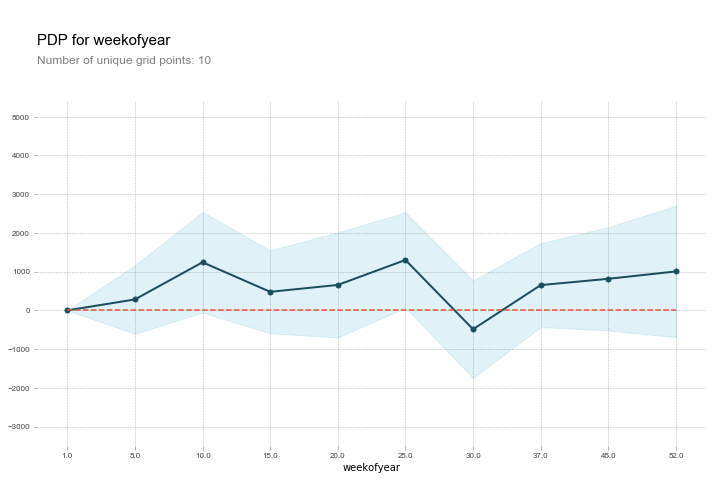

In [19]:
pdp.pdp_plot(pdp_weekofyear, 'weekofyear', figsize=(12, 8), x_quantile=True)

In [20]:
%%time 
pdp_weekofyear2 = pdp.pdp_isolate(rf, ross[ross_features], 'weekofyear', n_jobs=2)

Wall time: 24.1 s


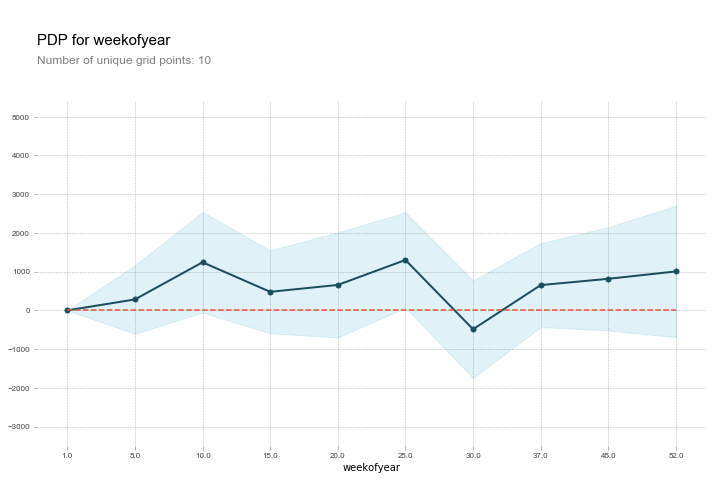

In [21]:
pdp.pdp_plot(pdp_weekofyear2, 'weekofyear', figsize=(12, 8), x_quantile=True)

Wall time: 8.22 s


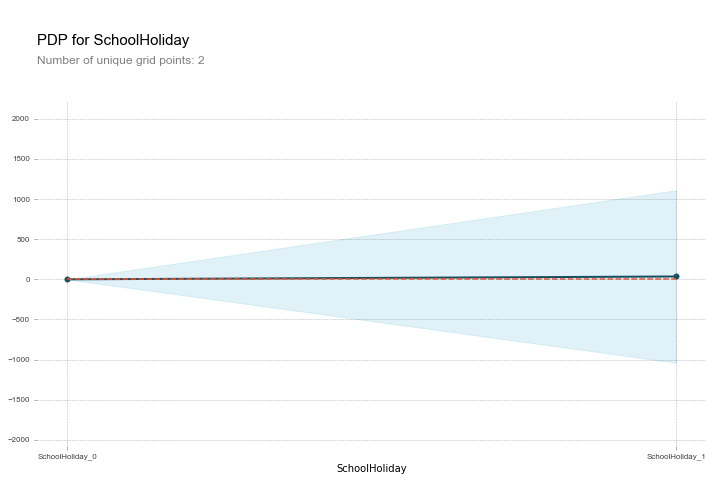

In [22]:
%%time
pdp_SchoolHoliday = new_parallel.pdp_isolate(rf, ross[ross_features], 'SchoolHoliday', memory_limit=0.5, n_jobs=2)
pdp.pdp_plot(pdp_SchoolHoliday, 'SchoolHoliday', figsize=(12, 8))

Wall time: 8.01 s


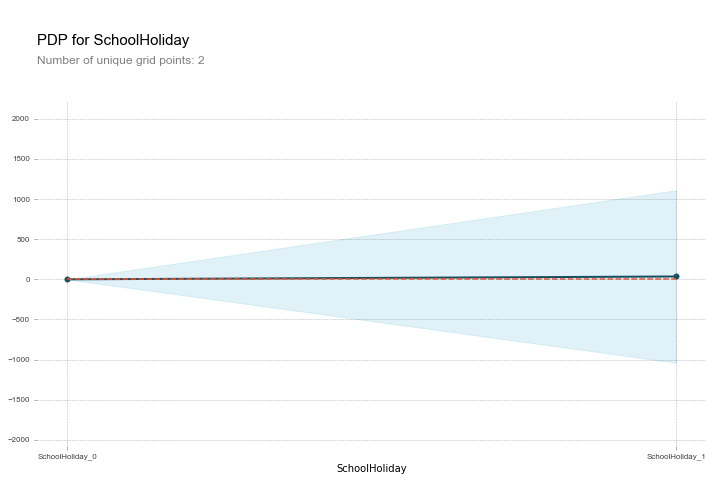

In [23]:
%%time
pdp_SchoolHoliday2 = pdp.pdp_isolate(rf, ross[ross_features], 'SchoolHoliday', n_jobs=2)
pdp.pdp_plot(pdp_SchoolHoliday2, 'SchoolHoliday', figsize=(12, 8))

Wall time: 10.6 s


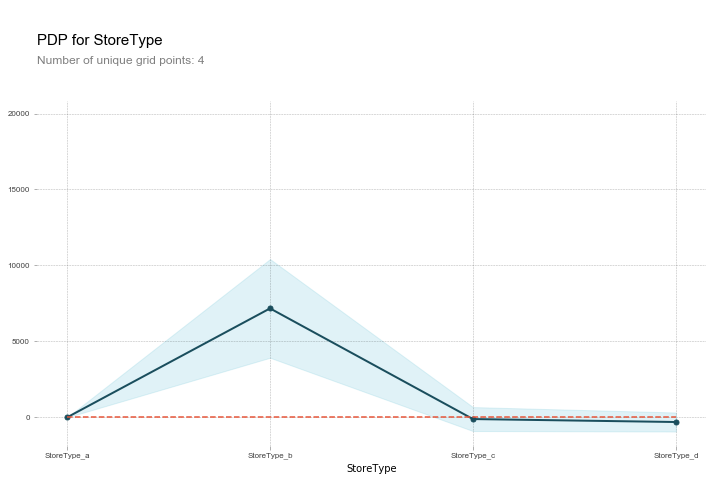

In [24]:
%%time
pdp_StoreType = new_parallel.pdp_isolate(rf, ross[ross_features], ['StoreType_a', 'StoreType_b', 
                                                                   'StoreType_c', 'StoreType_d'], memory_limit=0.5, n_jobs=2)
pdp.pdp_plot(pdp_StoreType, 'StoreType', figsize=(12, 8))

Wall time: 11.2 s


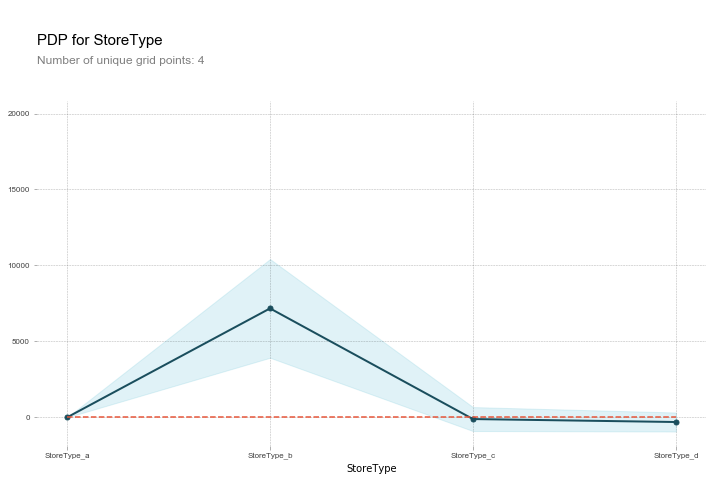

In [25]:
%%time
pdp_StoreType2 = pdp.pdp_isolate(rf, ross[ross_features], ['StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d'], n_jobs=2)
pdp.pdp_plot(pdp_StoreType2, 'StoreType', figsize=(12, 8))